In [26]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
image = cv2.imread('Solo leveling.jpeg', cv2.IMREAD_GRAYSCALE)

**PARTIE1**

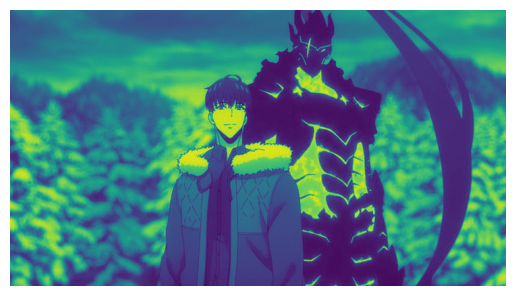

In [24]:
plt.imshow(image) 
plt.axis('off')  
plt.show()

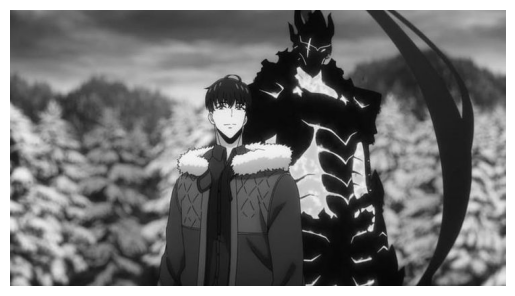

In [25]:
image_normal = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image_normal) 
plt.axis('off')   
plt.show()

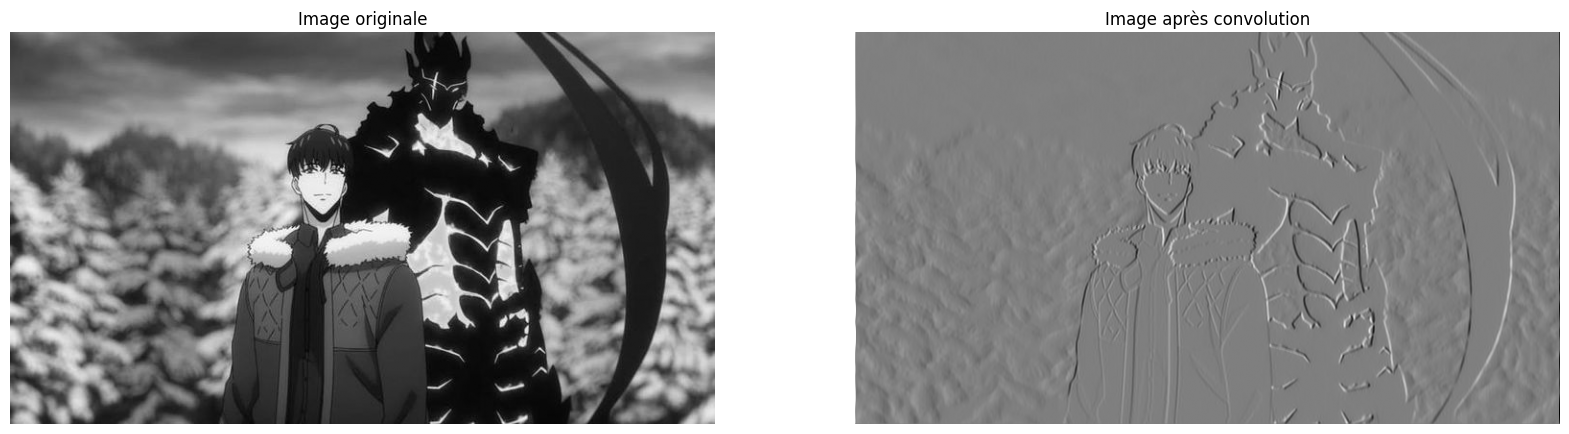

In [31]:
def convolution(image, kernel):
    h, w = image.shape  
    kh, kw = kernel.shape  
    pad_h, pad_w = kh // 2, kw // 2  

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    output = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kh, j:j+kw]   
            output[i, j] = np.sum(region * kernel)  

    return output

kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

convolved_image = convolution(image, kernel)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Image après convolution')
plt.axis('off')

plt.show()

**PARTIE2**

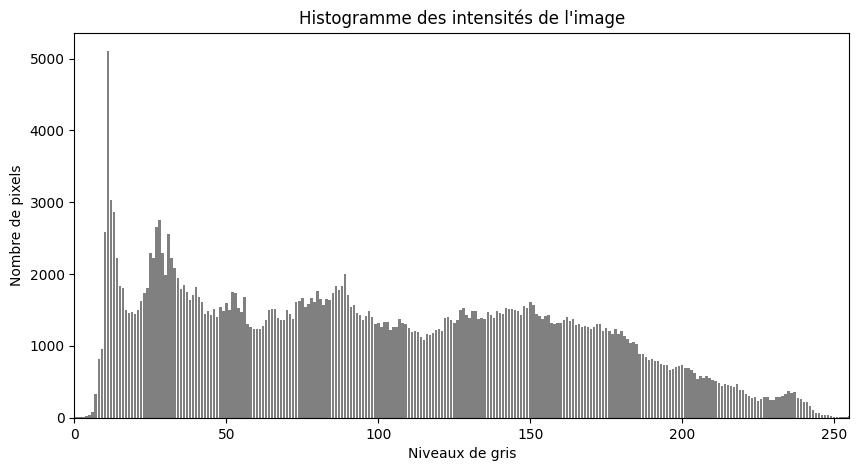

In [34]:
def calculer_histogramme(image):
    histogramme = np.zeros(256)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            intensite = image[i, j]  
            histogramme[intensite] += 1

    return histogramme

histogramme = calculer_histogramme(image)

plt.figure(figsize=(10, 5))
plt.bar(range(256), histogramme, color='gray')
plt.title('Histogramme des intensités de l\'image')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')
plt.xlim([0, 255]) 
plt.show()

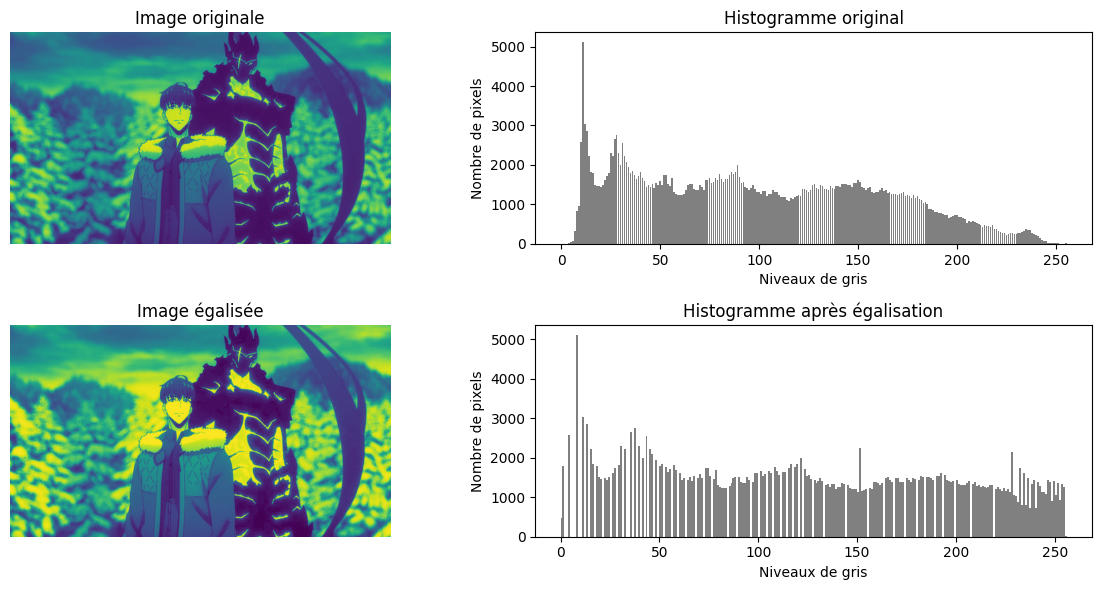

In [36]:
def calculer_histogramme(image):
    histogramme = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogramme[image[i, j]] += 1
    return histogramme

def egalisation_histogramme(image):
    h, w = image.shape
    histogramme = calculer_histogramme(image)
    
    hist_normalise = histogramme / (h * w)
    
    cdf = np.cumsum(hist_normalise)

    cdf_min = cdf[cdf > 0][0]  
    cdf_normalise = ((cdf - cdf_min) / (1 - cdf_min)) * 255  

    image_egalisee = np.interp(image, np.arange(256), cdf_normalise).astype(np.uint8)
    
    return image_egalisee, histogramme, cdf_normalise

image_egalisee, hist_orig, cdf_normalise = egalisation_histogramme(image)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Image originale')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.bar(range(256), hist_orig, color='gray')
plt.title('Histogramme original')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')

plt.subplot(2, 2, 3)
plt.imshow(image_egalisee)
plt.title('Image égalisée')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(image_egalisee.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogramme après égalisation')
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')

plt.tight_layout()
plt.show()

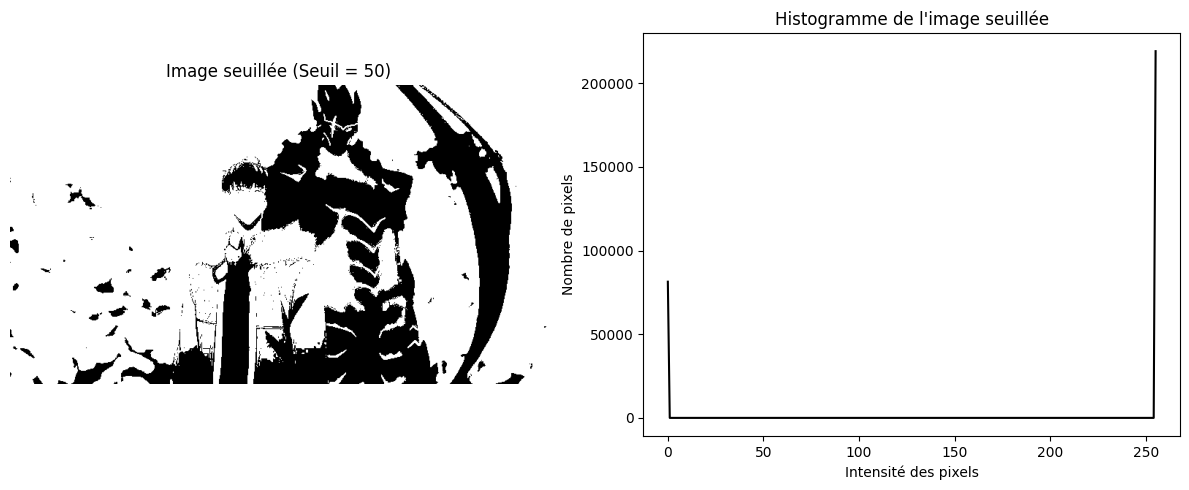

In [40]:
def seuillage(image, seuil):
    """
    Applique un seuillage binaire à une image.
    """
    image_seuillee = np.zeros_like(image)
    image_seuillee[image >= seuil] = 255
    return image_seuillee

seuil = 50

image_seuillee = seuillage(image, seuil)

histogram, bins = np.histogram(image_seuillee.flatten(), bins=256, range=[0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_seuillee, cmap='gray')
plt.title(f'Image seuillée (Seuil = {seuil})')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(histogram, color='black')
plt.title("Histogramme de l'image seuillée")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")

plt.tight_layout()
plt.show()